In [40]:
import numpy as np
from skimage.io import imshow
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import skimage.feature

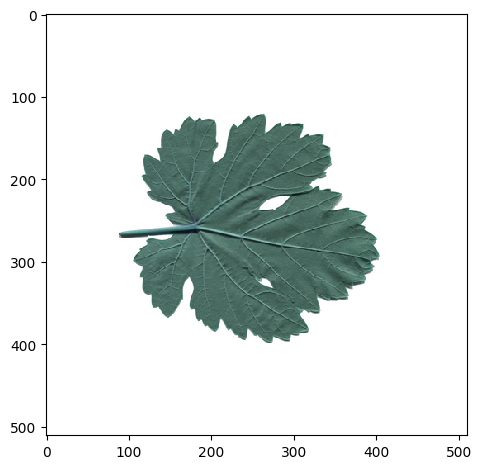

In [41]:
image = cv2.imread('/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Ala_Idris/Ala_Idris (10).png')
io.imshow(image)

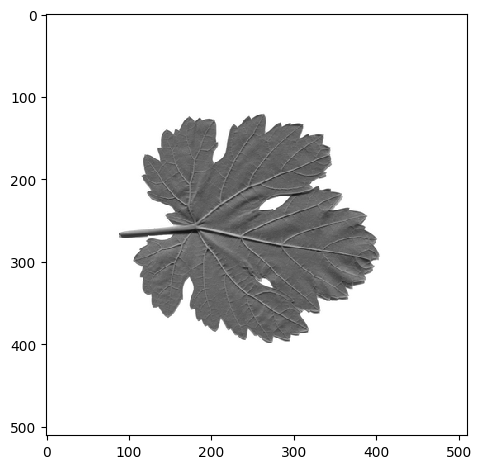

In [42]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
io.imshow(image)

In [43]:
# Resize the image
new_width = 300  
new_height = 200  
resized_image = cv2.resize(image, (new_width, new_height))

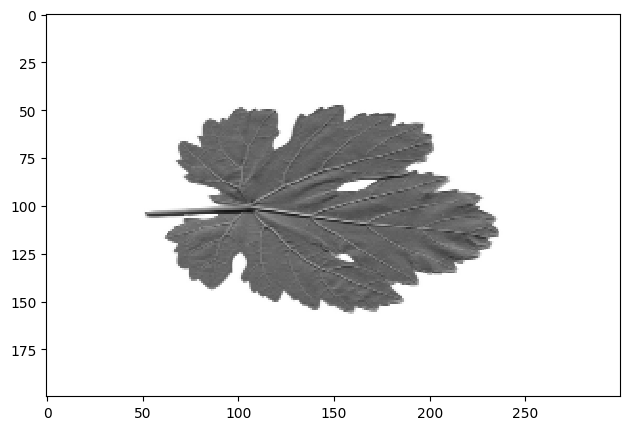

In [44]:
# Normalize the image 
normalized_image = resized_image / 255.0

# Display the resized and normalized image
imshow(normalized_image)

In [45]:
# Data Augmentation: Flip the image horizontally
flipped_image = cv2.flip(normalized_image, 1)

# Combine the original and flipped images
augmented_images = np.vstack([normalized_image.flatten(), flipped_image.flatten()])

# Scale HOG features
scaler = StandardScaler()
scaled_augmented_images = scaler.fit_transform(augmented_images)

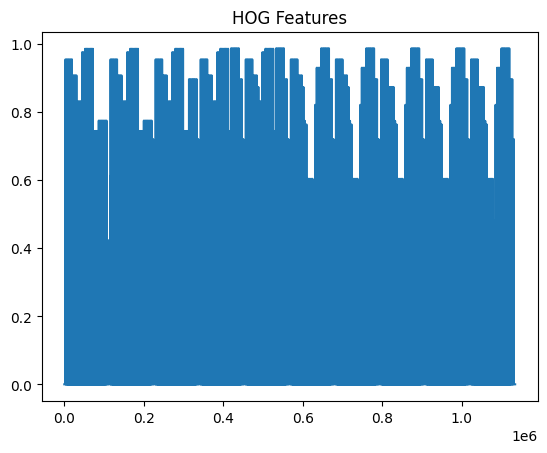

In [47]:
# Ensure normalized_image is of type uint8
normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

# Create an HOG descriptor
hog = cv2.HOGDescriptor()

# Compute HOG features directly from the normalized image
hog_features = hog.compute(normalized_image_uint8)

# Visualize HOG features
plt.plot(hog_features)
plt.title('HOG Features')
plt.show()


In [50]:
# Calculate the co-occurrence matrix for the image
co_matrix = skimage.feature.graycomatrix(image, [5], [0], levels=256, symmetric=True, normed=True)

# Calculate texture features from the co-occurrence matrix
contrast = skimage.feature.graycoprops(co_matrix, 'contrast')
correlation = skimage.feature.graycoprops(co_matrix, 'correlation')
energy = skimage.feature.graycoprops(co_matrix, 'energy')
homogeneity = skimage.feature.graycoprops(co_matrix, 'homogeneity')

# Print the texture features
print("Contrast:", contrast)
print("Correlation:", correlation)
print("Energy:", energy)
print("Homogeneity:", homogeneity)

Contrast: [[433.98180735]]
Correlation: [[0.945851]]
Energy: [[0.75749778]]
Homogeneity: [[0.78590277]]
